In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
df = pd.read_csv('../timing_tests/run_time_tests.csv')
df = df.drop(0)

In [3]:
df.columns

Index(['mesh', 'boxsize', 'zs', 'steps', 'interp ', 'procs', 'vjp', 'jvp',
       'time'],
      dtype='object')

In [4]:
def select(df, props, vals):
    for p, v in zip(props, vals):
        df= df[df[p]==v]
    return df

In [5]:
PLOTPATH = '/global/homes/v/vboehm/codes/MADLens/figures'

     mesh  boxsize   zs  steps interp   procs    vjp    jvp  time
53  256.0    256.0  0.5   11.0   False   32.0  False  False  28.0
54  256.0    256.0  1.0   11.0   False   32.0  False  False  39.0
55  256.0    256.0  1.5   11.0   False   32.0  False  False  51.0
56  256.0    256.0  2.0   11.0   False   32.0  False  False  59.0
    mesh  boxsize   zs  steps interp   procs    vjp    jvp  time
1  128.0    256.0  0.5   11.0   False   32.0  False  False  11.0
2  128.0    256.0  1.0   11.0   False   32.0  False  False  14.0
3  128.0    256.0  1.5   11.0   False   32.0  False  False  17.0
4  128.0    256.0  2.0   11.0   False   32.0  False  False  23.0


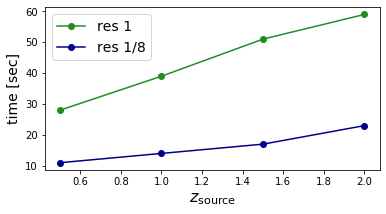

In [34]:
dd = select(df, ['interp ','steps'],[False,11])
d1 = select(dd, ['mesh','boxsize','procs'], [256, 256, 32])
d2 = select(dd, ['mesh','boxsize', 'procs'], [128, 256, 32])

print(d1)
print(d2)
plt.figure(figsize=(6,3))
plt.plot(d1['zs'], d1['time'],marker='o', label='res 1', color='forestgreen')
plt.plot(d2['zs'], d2['time'],marker='o', label='res 1/8', color='darkblue')
plt.legend(fontsize=14)
plt.ylabel('time [sec]', fontsize=14)
plt.xlabel('$z_\mathrm{source}$', fontsize=16)
plt.savefig(os.path.join(PLOTPATH,'timing.pdf'),bbox_inches='tight')
plt.show()

     mesh  boxsize   zs  steps interp   procs    vjp    jvp  time
17  128.0    256.0  0.5   11.0    True   32.0  False  False  11.0
18  128.0    256.0  1.0   11.0    True   32.0  False  False  16.0
19  128.0    256.0  1.5   11.0    True   32.0  False  False  20.0
20  128.0    256.0  2.0   11.0    True   32.0  False  False  25.0
     mesh  boxsize   zs  steps interp   procs    vjp    jvp  time
21  256.0    256.0  0.5   11.0    True   64.0  False  False  34.0
22  256.0    256.0  1.0   11.0    True   64.0  False  False  45.0
23  256.0    256.0  1.5   11.0    True   64.0  False  False  54.0
24  256.0    256.0  2.0   11.0    True   64.0  False  False  65.0


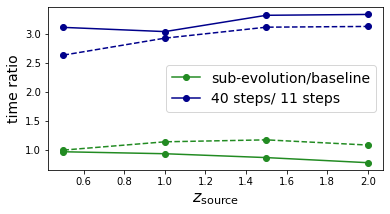

In [35]:
colors = ['forestgreen','darkblue']
plt.figure(figsize=(6,3))
for ii,(mesh, procs, ls) in enumerate(zip([128,256],[32,64],['--','-'])):
    dd = select(df, ['mesh','boxsize'],[mesh,256])
    d1 = select(dd, ['interp ', 'steps', 'vjp', 'jvp'], [True, 11, False, False])
    d2 = select(dd, ['interp ','steps','procs'], [False, 11, procs])
    d3 = select(dd, ['interp ', 'steps','procs'], [False, 11, procs])
    d4 = select(dd, ['interp ','steps','procs'], [False, 40, procs])
    print(d1)
    if ii==1:
        d = plt.plot(d1['zs'], d1['time'].to_numpy()/d2['time'],marker='o', ls=ls, color=colors[0], label='sub-evolution/baseline')
        plt.plot(d2['zs'], d4['time'].to_numpy()/d3['time'],marker='o',ls=ls,color= colors[1],label='40 steps/ 11 steps')
    else:
        d = plt.plot(d1['zs'], d1['time'].to_numpy()/d2['time'],marker='o', ls=ls, color=colors[0])
        plt.plot(d2['zs'], d4['time'].to_numpy()/d3['time'],marker='o',ls=ls,color= colors[1])
plt.legend(fontsize=14)
plt.ylabel('time ratio', fontsize=14)
plt.xlabel('$z_\mathrm{source}$', fontsize=16)
plt.savefig(os.path.join(PLOTPATH,'timing_ratios.pdf'),bbox_inches='tight')
plt.show()

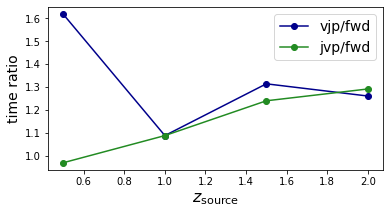

In [139]:
dd = select(df, ['mesh','boxsize'],[256,256])

d_vjp = select(dd, ['interp ', 'steps', 'vjp', 'jvp'], [True, 11, True, False])
d_jvp = select(dd, ['interp ', 'steps', 'vjp', 'jvp'], [True, 11, False, True])
d_fwd = select(dd, ['interp ', 'steps', 'vjp', 'jvp'], [True, 11, False, False])

plt.figure(figsize=(6,3))
plt.plot(d_vjp['zs'], d_vjp['time'].to_numpy()/d_fwd['time']-1,marker='o', label='vjp/fwd', color='darkblue')
plt.plot(d_jvp['zs'], d_jvp['time'].to_numpy()/d_fwd['time']-1,marker='o', label='jvp/fwd', color='forestgreen')
plt.legend(fontsize=14)
plt.ylabel('time ratio', fontsize=14)
plt.xlabel('$z_\mathrm{source}$', fontsize=16)
plt.savefig(os.path.join(PLOTPATH,'vjp_jvp_timing.pdf'),bbox_inches='tight')
plt.show()

     mesh  boxsize   zs  steps interp   procs    vjp    jvp  time
53  256.0    256.0  0.5   11.0   False   32.0  False  False  28.0
54  256.0    256.0  1.0   11.0   False   32.0  False  False  39.0
55  256.0    256.0  1.5   11.0   False   32.0  False  False  51.0
56  256.0    256.0  2.0   11.0   False   32.0  False  False  59.0
     mesh  boxsize   zs  steps interp   procs    vjp    jvp  time
53  256.0    256.0  0.5   11.0   False   32.0  False  False  28.0
54  256.0    256.0  1.0   11.0   False   32.0  False  False  39.0
55  256.0    256.0  1.5   11.0   False   32.0  False  False  51.0
56  256.0    256.0  2.0   11.0   False   32.0  False  False  59.0
     mesh  boxsize   zs  steps interp   procs    vjp    jvp  time
53  256.0    256.0  0.5   11.0   False   32.0  False  False  28.0
54  256.0    256.0  1.0   11.0   False   32.0  False  False  39.0
55  256.0    256.0  1.5   11.0   False   32.0  False  False  51.0
56  256.0    256.0  2.0   11.0   False   32.0  False  False  59.0
     mesh 

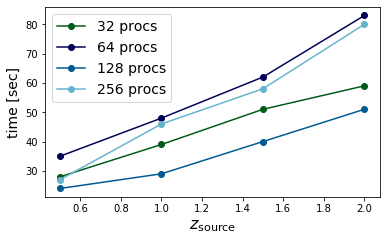

In [13]:
from matplotlib import cm
dd = select(df, ['mesh','boxsize'],[256,256])
cm_subsection = np.linspace(0.1, 0.8, 4) 

colors = [ cm.ocean(x) for x in cm_subsection ]

plt.figure(figsize=(6,3.5))
for ii, procs in enumerate([32.,64.,128.,256.]):
    d_1 = select(dd, ['interp ', 'steps', 'vjp', 'jvp','procs'], [False, 11, False, False, procs])

    plt.plot(d_1['zs'], d_1['time'].to_numpy(),marker='o', color=colors[ii],label='%d procs'%procs)
    print(d1)
plt.legend(fontsize=14,ncol=1)
plt.ylabel('time [sec]', fontsize=14)
plt.xlabel('$z_\mathrm{source}$', fontsize=16)
plt.savefig(os.path.join(PLOTPATH,'timing_procs.pdf'),bbox_inches='tight')
plt.show()

     mesh  boxsize   zs  steps interp   procs    vjp    jvp  time
53  256.0    256.0  0.5   11.0   False   32.0  False  False  28.0
5   256.0    256.0  0.5   11.0   False   64.0  False  False  35.0
37  256.0    256.0  0.5   11.0   False  128.0  False  False  24.0
33  256.0    256.0  0.5   11.0   False  256.0  False  False  27.0
     mesh  boxsize   zs  steps interp   procs    vjp    jvp  time
54  256.0    256.0  1.0   11.0   False   32.0  False  False  39.0
6   256.0    256.0  1.0   11.0   False   64.0  False  False  48.0
38  256.0    256.0  1.0   11.0   False  128.0  False  False  29.0
34  256.0    256.0  1.0   11.0   False  256.0  False  False  46.0
     mesh  boxsize   zs  steps interp   procs    vjp    jvp  time
55  256.0    256.0  1.5   11.0   False   32.0  False  False  51.0
7   256.0    256.0  1.5   11.0   False   64.0  False  False  62.0
39  256.0    256.0  1.5   11.0   False  128.0  False  False  40.0
35  256.0    256.0  1.5   11.0   False  256.0  False  False  58.0
     mesh 

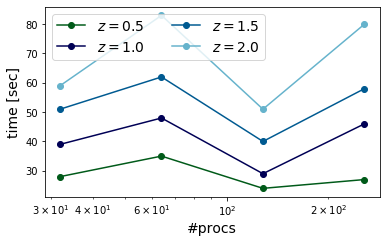

In [33]:
plt.figure(figsize=(6,3.5))
dd = select(df, ['mesh','boxsize'],[256,256])

d_1 = select(dd, ['interp ', 'steps', 'vjp', 'jvp'], [False, 11, False, False])

cm_subsection = np.linspace(0.1, 0.8,len(d_1['zs'].unique()) ) 

colors = [ cm.ocean(x) for x in cm_subsection ]
for ii, z in enumerate(d_1['zs'].unique()):
    d_11 = d_1[d_1['zs']==z]
    d_11 = d_11.sort_values('procs')
    print(d_11)
    plt.semilogx(d_11['procs'], d_11['time'].to_numpy(),marker='o', color=colors[ii],label='$z=$%.1f'%z)
#     print(d1)
plt.legend(fontsize=14,ncol=2)
plt.ylabel('time [sec]', fontsize=14)
plt.xlabel('#procs', fontsize=14)
plt.savefig(os.path.join(PLOTPATH,'timing_procs_1.pdf'),bbox_inches='tight')
plt.show()